### Data Story with MovieLens 100K

#### Author: Aritra Chattaraj

#### Mentor: Sumit Dutta

#### Capstone Project One

#### Summary

The idea of this mini project is to document all my visuals and exploratory findings on the MovieLens 100K data and to build hypotheses that can be explored. These hypotheses will help us shape our data in a consumable format for the end product which will be a recommendation system.

The first few parts of this document will overlap with the data wrangling mini project and beyond that, we have data exploration with visuals to find out any insights, correlations which can be used to tailor our hypotheses.

Finally, we end with a data story regarding our data which will explain to you the potential within the data that is to be explored and investigated.

#### Table of Contents

1.[Introduction](#intro)

2.[Data Reading & Viewing](#datareading)

3.[Data Cleaning](#datacleaning)

4.[Missing Values & Outliers](#missingvalues)

5.[Exploratory Data Analysis](#eda)

6.[Insights & Correlations](#insights)

7.[Hypotheses](#hypotheses)

8.[Data Story](#datastory)

9.[Conclusion](#conclusion)

#### 1. Introduction <a id = 'intro'></a>

Lorem Ipsum about data set, etc.

#### 2. Data Reading & Viewing <a id = 'datareading'></a>

In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the three data parts

# Reading user data

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users_df = pd.read_csv('../data/u.user', sep = '|', names = u_cols,
                       encoding = 'latin1')

# Reading ratings data

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('../data/u.data', sep = '\t', names = r_cols,
                        encoding = 'latin1')

# Reading movies data

m_cols = item_cols = ['movie_id', 'movie_title', 'release_date',
                      'video_release_date', 'imdb_url',
                      'unknown', 'action', 'adventure',
                      'animation', 'childrens', 'comedy',
                      'crime', 'documentary', 'drama',
                      'fantasy', 'film-noir', 'horror',
                      'musical', 'mystery', 'romance',
                      'sci-fi', 'thriller', 'war', 'western']
movies_df = pd.read_csv('../data/u.item', sep = '|', names = m_cols,
                        encoding = 'latin1')

In [3]:
users_df.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
ratings_df.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movies_df.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 3. Data Cleaning <a id = 'datacleaning'></a>

##### Aggregating

In [6]:
# First join

new_df_one = pd.merge(movies_df, ratings_df, on = 'movie_id')

In [7]:
# Final join

final_train_df = pd.merge(new_df_one, users_df, on = 'user_id')

In [8]:
final_train_df.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076


##### Data Cleaning with Column/Row drops

In [9]:
final_train_df.video_release_date.unique()

array([nan])

In [10]:
# Dropping video_release_date from final_train_df

final_train_df.drop('video_release_date', axis = 1, inplace = True)

In [11]:
final_train_df.columns

Index(['movie_id', 'movie_title', 'release_date', 'imdb_url', 'unknown',
       'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical',
       'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western', 'user_id',
       'rating', 'unix_timestamp', 'age', 'sex', 'occupation', 'zip_code'],
      dtype='object')

In [12]:
# Dropping imdb_url column since we do not plan on using it

final_train_df.drop('imdb_url', axis = 1, inplace = True)

In [13]:
final_train_df.columns

Index(['movie_id', 'movie_title', 'release_date', 'unknown', 'action',
       'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery',
       'romance', 'sci-fi', 'thriller', 'war', 'western', 'user_id', 'rating',
       'unix_timestamp', 'age', 'sex', 'occupation', 'zip_code'],
      dtype='object')

#### Dealing with Data Types:

In [14]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null object
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
user_id  

In [15]:
# Reinforcing string type on movie_title

final_train_df.movie_title = final_train_df.movie_title.astype('str')

In [16]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null object
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
user_id  

In [17]:
# Converting release_date column entries to datetime objects in YYYY-MM-DD format.

final_train_df.release_date = pd.to_datetime(final_train_df.release_date)

In [18]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null datetime64[ns]
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
u

In [19]:
# Reinforcing float data type for our rating column 

final_train_df.rating = final_train_df.rating.astype('float')

In [20]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null datetime64[ns]
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
u

In [21]:
# Converting sex column to categorical data type 

final_train_df.sex = final_train_df.sex.astype('category')

In [22]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null datetime64[ns]
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
u

In [23]:
# Converting occupation column data type to category

final_train_df.occupation = final_train_df.occupation.astype('category')

In [24]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null datetime64[ns]
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
u

In [25]:
# Converting zip_code column to int data type

final_train_df.zip_code 

# Seems to be having trouble converting to int or float

0        95076
1        95076
2        95076
3        95076
4        95076
5        95076
6        95076
7        95076
8        95076
9        95076
10       95076
11       95076
12       95076
13       95076
14       95076
15       95076
16       95076
17       95076
18       95076
19       95076
20       95076
21       95076
22       95076
23       95076
24       95076
25       95076
26       95076
27       95076
28       95076
29       95076
         ...  
99970    38866
99971    38866
99972    38866
99973    38866
99974    38866
99975    38866
99976    38866
99977    38866
99978    38866
99979    56567
99980    56567
99981    56567
99982    56567
99983    56567
99984    56567
99985    56567
99986    56567
99987    56567
99988    56567
99989    56567
99990    56567
99991    56567
99992    56567
99993    56567
99994    56567
99995    56567
99996    56567
99997    56567
99998    56567
99999    56567
Name: zip_code, Length: 100000, dtype: object

In [26]:
# As we can see above, some of the zip codes are alphanumeric 
# Some countries such as Canada follow alphanumeric zipcodes convention
# We, therefore, convert zipcode to str class

final_train_df.zip_code = final_train_df.zip_code.astype('str')

In [27]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null datetime64[ns]
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
u

In [28]:
final_train_df.head()

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,308,4.0,887736532,60,M,retired,95076
1,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,308,5.0,887737890,60,M,retired,95076
2,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,1,0,0,308,4.0,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,308,4.0,887738847,60,M,retired,95076
4,8,Babe (1995),1995-01-01,0,0,0,0,1,1,0,...,0,0,0,308,5.0,887736696,60,M,retired,95076


#### 4. Handling Missing Values and Outliers

In [29]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          100000 non-null int64
movie_title       100000 non-null object
release_date      99991 non-null datetime64[ns]
unknown           100000 non-null int64
action            100000 non-null int64
adventure         100000 non-null int64
animation         100000 non-null int64
childrens         100000 non-null int64
comedy            100000 non-null int64
crime             100000 non-null int64
documentary       100000 non-null int64
drama             100000 non-null int64
fantasy           100000 non-null int64
film-noir         100000 non-null int64
horror            100000 non-null int64
musical           100000 non-null int64
mystery           100000 non-null int64
romance           100000 non-null int64
sci-fi            100000 non-null int64
thriller          100000 non-null int64
war               100000 non-null int64
western           100000 non-null int64
u

In [30]:
final_train_df[final_train_df.release_date.isna() == True]

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
899,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,5,4.0,875635064,33,F,other,15213
2092,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,268,3.0,875742077,24,M,engineer,19422
11419,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,422,4.0,875655986,26,M,entertainment,94533
20369,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,1,4.0,875692955,24,M,technician,85711
23138,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,297,3.0,875409139,29,F,educator,98103
27774,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,532,3.0,875441348,20,M,student,92705
41706,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,130,5.0,875801239,20,M,none,60115
78071,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,833,1.0,875655669,34,M,writer,90019
99692,267,unknown,NaT,1,0,0,0,0,0,0,...,0,0,0,319,4.0,875707690,38,M,programmer,22030


In [31]:
final_train_df = final_train_df.dropna()

In [32]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 29 columns):
movie_id          99991 non-null int64
movie_title       99991 non-null object
release_date      99991 non-null datetime64[ns]
unknown           99991 non-null int64
action            99991 non-null int64
adventure         99991 non-null int64
animation         99991 non-null int64
childrens         99991 non-null int64
comedy            99991 non-null int64
crime             99991 non-null int64
documentary       99991 non-null int64
drama             99991 non-null int64
fantasy           99991 non-null int64
film-noir         99991 non-null int64
horror            99991 non-null int64
musical           99991 non-null int64
mystery           99991 non-null int64
romance           99991 non-null int64
sci-fi            99991 non-null int64
thriller          99991 non-null int64
war               99991 non-null int64
western           99991 non-null int64
user_id           99991

In [33]:
final_train_df[final_train_df.release_date.isna() == True]

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code


In [34]:
final_train_df[final_train_df.movie_title == 'unknown']

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code


In [35]:
final_train_df[final_train_df.unknown == 1]

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
1641,1373,Good Morning (1971),1971-02-04,1,0,0,0,0,0,0,...,0,0,0,181,1.0,878962052,26,M,executive,21218


In [36]:
final_train_df.unknown.value_counts()

0    99990
1        1
Name: unknown, dtype: int64

In [37]:
# We drop the entire column since it adds no new information

final_train_df.drop('unknown', axis = 1, inplace = True)

In [38]:
final_train_df.columns

Index(['movie_id', 'movie_title', 'release_date', 'action', 'adventure',
       'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western', 'user_id', 'rating',
       'unix_timestamp', 'age', 'sex', 'occupation', 'zip_code'],
      dtype='object')

In [39]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 28 columns):
movie_id          99991 non-null int64
movie_title       99991 non-null object
release_date      99991 non-null datetime64[ns]
action            99991 non-null int64
adventure         99991 non-null int64
animation         99991 non-null int64
childrens         99991 non-null int64
comedy            99991 non-null int64
crime             99991 non-null int64
documentary       99991 non-null int64
drama             99991 non-null int64
fantasy           99991 non-null int64
film-noir         99991 non-null int64
horror            99991 non-null int64
musical           99991 non-null int64
mystery           99991 non-null int64
romance           99991 non-null int64
sci-fi            99991 non-null int64
thriller          99991 non-null int64
war               99991 non-null int64
western           99991 non-null int64
user_id           99991 non-null int64
rating            99991

In [40]:
final_train_df.movie_id.value_counts()

50      583
258     509
100     508
181     507
294     485
286     481
288     478
1       452
300     431
121     429
174     420
127     413
56      394
7       392
98      390
237     384
117     378
172     367
222     365
313     350
204     350
405     344
79      336
210     331
151     326
173     324
69      321
168     316
748     316
269     315
       ... 
1492      1
1587      1
1651      1
1624      1
1559      1
1460      1
599       1
1494      1
1366      1
1621      1
1557      1
1493      1
1461      1
1653      1
1364      1
1679      1
1236      1
852       1
1619      1
1363      1
1235      1
1526      1
1654      1
1682      1
1618      1
1681      1
1680      1
1616      1
1655      1
1663      1
Name: movie_id, Length: 1681, dtype: int64

In [41]:
final_train_df.movie_title.value_counts()

Star Wars (1977)                                583
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
English Patient, The (1996)                     481
Scream (1996)                                   478
Toy Story (1995)                                452
Air Force One (1997)                            431
Independence Day (ID4) (1996)                   429
Raiders of the Lost Ark (1981)                  420
Godfather, The (1972)                           413
Pulp Fiction (1994)                             394
Twelve Monkeys (1995)                           392
Silence of the Lambs, The (1991)                390
Jerry Maguire (1996)                            384
Chasing Amy (1997)                              379
Rock, The (1996)                                378
Empire Strikes Back, The (1980)                 367
Star Trek: F

In [42]:
final_train_df.release_date.value_counts()

1995-01-01    9932
1994-01-01    8890
1997-01-01    7078
1993-01-01    6657
1989-01-01    2360
1992-01-01    2313
1990-01-01    2092
1991-01-01    1899
1986-01-01    1552
1982-01-01    1456
1984-01-01    1267
1987-01-01    1151
1980-01-01    1114
1979-01-01    1114
1981-01-01    1003
1974-01-01     981
1985-01-01     920
1997-03-14     919
1988-01-01     908
1996-02-16     844
1997-02-14     828
1977-01-01     818
1971-01-01     782
1996-12-20     752
1996-11-15     736
1996-12-13     714
1975-01-01     679
1996-11-22     651
1997-03-21     644
1963-01-01     640
              ... 
1932-01-01      12
1996-07-17      10
1976-03-08       9
1996-09-04       8
1998-04-03       8
1960-06-28       7
1998-01-21       6
1996-06-05       5
1997-05-01       5
1997-03-05       5
1997-09-01       5
1998-02-01       4
1997-05-14       3
1994-09-16       3
1998-10-09       3
1997-04-22       3
1996-09-16       2
1998-03-06       2
1996-09-24       2
1926-01-01       2
1996-07-22       1
1971-02-04  

In [43]:
final_train_df.action.value_counts()

0    74402
1    25589
Name: action, dtype: int64

In [44]:
final_train_df.adventure.value_counts()

0    86238
1    13753
Name: adventure, dtype: int64

In [45]:
final_train_df.animation.value_counts()

0    96386
1     3605
Name: animation, dtype: int64

In [46]:
final_train_df.childrens.value_counts()

0    92809
1     7182
Name: childrens, dtype: int64

In [47]:
final_train_df.comedy.value_counts()

0    70159
1    29832
Name: comedy, dtype: int64

In [48]:
final_train_df.crime.value_counts()

0    91936
1     8055
Name: crime, dtype: int64

In [49]:
final_train_df.documentary.value_counts()

0    99233
1      758
Name: documentary, dtype: int64

In [50]:
final_train_df.drama.value_counts()

0    60096
1    39895
Name: drama, dtype: int64

In [51]:
final_train_df.fantasy.value_counts()

0    98639
1     1352
Name: fantasy, dtype: int64

In [52]:
final_train_df['film-noir'].value_counts()

0    98258
1     1733
Name: film-noir, dtype: int64

In [53]:
final_train_df.horror.value_counts()

0    94674
1     5317
Name: horror, dtype: int64

In [54]:
final_train_df.mystery.value_counts()

0    94746
1     5245
Name: mystery, dtype: int64

In [55]:
final_train_df.musical.value_counts()

0    95037
1     4954
Name: musical, dtype: int64

In [56]:
final_train_df.romance.value_counts()

0    80530
1    19461
Name: romance, dtype: int64

In [57]:
final_train_df['sci-fi'].value_counts()

0    87261
1    12730
Name: sci-fi, dtype: int64

In [58]:
final_train_df.thriller.value_counts()

0    78119
1    21872
Name: thriller, dtype: int64

In [59]:
final_train_df.war.value_counts()

0    90593
1     9398
Name: war, dtype: int64

In [60]:
final_train_df.western.value_counts()

0    98137
1     1854
Name: western, dtype: int64

In [61]:
final_train_df.user_id.value_counts()

405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
181    435
279    434
429    414
846    405
7      403
94     400
682    399
308    397
92     388
293    388
222    387
201    386
59     382
435    379
378    375
880    368
417    365
896    362
592    360
796    358
      ... 
418     20
242     20
558     20
685     20
812     20
364     20
300     20
631     20
873     20
809     20
166     20
740     20
36      20
866     20
34      20
143     20
824     20
888     20
926     20
441     20
93      20
732     20
475     20
571     20
596     20
147     20
19      20
572     20
636     20
895     20
Name: user_id, Length: 943, dtype: int64

In [62]:
final_train_df.rating.value_counts()

4.0    34170
3.0    27142
5.0    21200
2.0    11370
1.0     6109
Name: rating, dtype: int64

In [63]:
final_train_df.unix_timestamp.value_counts()

891033606    12
879425432    10
891500028    10
879439645    10
877018125    10
885548877    10
889237455    10
884493279    10
892333573    10
891436543    10
885546577    10
891457067    10
879435369    10
878951101    10
878962086    10
883245452    10
885547506    10
890860566    10
881274504    10
878962550    10
882426508    10
889399113    10
892845634    10
887347350    10
879440109    10
891045496    10
879701253    10
882912418    10
885548785    10
891397015    10
             ..
880136174     1
875658968     1
879435764     1
892790003     1
882693429     1
874827062     1
879455186     1
881374521     1
878759758     1
876232528     1
875310442     1
878952288     1
879916385     1
876232023     1
884991851     1
878953815     1
882589552     1
880740215     1
888479052     1
875638090     1
892778369     1
891170275     1
880473993     1
888203147     1
890687374     1
891961232     1
886989276     1
879441225     1
886523207     1
879646677     1
Name: unix_timestamp, Le

In [64]:
final_train_df.age.value_counts()

27    6423
24    4554
20    4087
25    4013
22    3979
30    3762
29    3649
28    3619
32    3526
19    3514
26    3502
35    3363
21    3020
33    2938
31    2757
23    2683
39    2610
36    2476
51    2232
18    2219
44    2135
50    2066
38    1882
40    1841
48    1725
42    1699
47    1614
60    1609
49    1556
43    1480
      ... 
37    1128
46    1069
57    1003
41     976
45     926
17     897
53     749
56     708
55     644
52     629
13     497
15     397
58     367
16     335
61     282
14     264
65     229
54     214
69     156
70     141
64      95
68      92
59      92
63      77
73      56
62      46
7       43
66      37
10      31
11      27
Name: age, Length: 61, dtype: int64

In [65]:
final_train_df.sex.value_counts()

M    74253
F    25738
Name: sex, dtype: int64

In [66]:
final_train_df.occupation.value_counts()

student          21956
other            10662
educator          9441
engineer          8174
programmer        7800
administrator     7479
writer            5535
librarian         5273
technician        3505
executive         3403
healthcare        2804
artist            2308
entertainment     2094
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               900
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64

In [67]:
final_train_df.zip_code.value_counts()

55414    1103
20009     878
10019     850
22902     832
61820     817
48103     746
10003     736
60657     685
80525     678
83702     639
29206     636
92626     564
11758     540
55105     539
95064     518
55408     506
21218     493
14853     484
94702     480
91344     473
83686     448
63108     448
85251     434
44212     420
29205     414
53706     408
47130     405
71457     400
55128     399
95076     397
         ... 
37725      21
02903      21
95050      21
32250      21
44405      21
30040      21
38866      20
01701      20
70802      20
60302      20
63132      20
93117      20
55013      20
76234      20
02138      20
21206      20
15017      20
75230      20
77073      20
23112      20
33763      20
01945      20
98405      20
17036      20
42141      20
08832      20
30803      20
31404      20
48043      20
02143      20
Name: zip_code, Length: 795, dtype: int64

##### Outlier Handling

In [68]:
final_train_df.dtypes

movie_id                   int64
movie_title               object
release_date      datetime64[ns]
action                     int64
adventure                  int64
animation                  int64
childrens                  int64
comedy                     int64
crime                      int64
documentary                int64
drama                      int64
fantasy                    int64
film-noir                  int64
horror                     int64
musical                    int64
mystery                    int64
romance                    int64
sci-fi                     int64
thriller                   int64
war                        int64
western                    int64
user_id                    int64
rating                   float64
unix_timestamp             int64
age                        int64
sex                     category
occupation              category
zip_code                  object
dtype: object

In [69]:
# Let's look at our outlier observations (numerical columns only)
# Let's check out age

import statsmodels.api as sm
import pylab

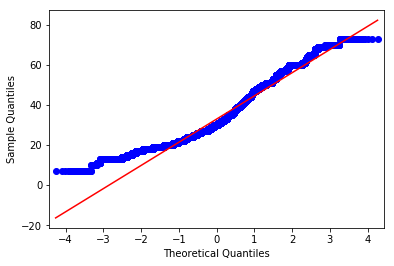

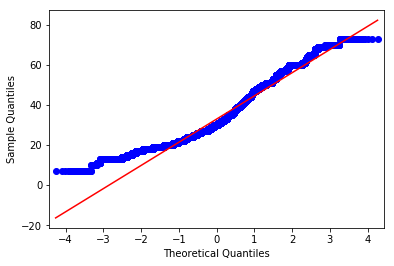

In [70]:
# Firstly, let's check out what the qqplot reveals about 'age'

sm.qqplot(final_train_df.age, line = 's')

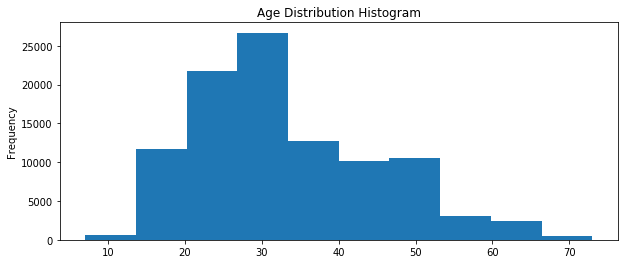

In [71]:
# The qqplot reveals a left-skewed data, let us try other visualizations

plt.figure(figsize = (10, 4))
plt.title('Age Distribution Histogram')
final_train_df.age.plot(kind = 'hist');

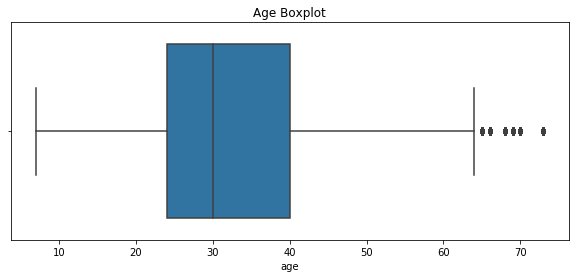

In [72]:
# The aforementioned plot proves the left-skewness of the variable
# let us try another plot

plt.figure(figsize = (10, 4))
plt.title('Age Boxplot')
sns.boxplot(final_train_df.age);

In [73]:
# Let's check some descriptive stats

final_train_df.age.describe()

count    99991.000000
mean        32.970337
std         11.562889
min          7.000000
25%         24.000000
50%         30.000000
75%         40.000000
max         73.000000
Name: age, dtype: float64

In [74]:
# Checking entries of the 7 year old viewer

final_train_df[final_train_df.age == 7]

,movie_id,movie_title,release_date,action,adventure,animation,childrens,comedy,crime,documentary,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
66934,2,GoldenEye (1995),1995-01-01,1,1,0,0,0,0,0,...,1,0,0,30,3.0,875061066,7,M,student,55436
66935,7,Twelve Monkeys (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,30,4.0,875140648,7,M,student,55436
66936,28,Apollo 13 (1995),1995-01-01,1,0,0,0,0,0,0,...,1,0,0,30,4.0,885941321,7,M,student,55436
66937,29,Batman Forever (1995),1995-01-01,1,1,0,0,1,1,0,...,0,0,0,30,3.0,875106638,7,M,student,55436
66938,50,Star Wars (1977),1977-01-01,1,1,0,0,0,0,0,...,0,1,0,30,3.0,875061066,7,M,student,55436
66939,69,Forrest Gump (1994),1994-01-01,0,0,0,0,1,0,0,...,0,1,0,30,5.0,885941156,7,M,student,55436
66940,82,Jurassic Park (1993),1993-01-01,1,1,0,0,0,0,0,...,0,0,0,30,4.0,875060217,7,M,student,55436
66941,135,2001: A Space Odyssey (1968),1968-01-01,0,0,0,0,0,0,0,...,1,0,0,30,5.0,885941156,7,M,student,55436
66942,161,Top Gun (1986),1986-01-01,1,0,0,0,0,0,0,...,0,0,0,30,4.0,875060883,7,M,student,55436
66943,164,"Abyss, The (1989)",1989-01-01,1,1,0,0,0,0,0,...,1,0,0,30,4.0,875060217,7,M,student,55436


In [75]:
# Function 1 - Detect Outliers based on IQR 

def iqr_detect_outliers(df, column):
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1 
    fence_low, fence_high  = q1 - 1.5*iqr, q3 + 1.5*iqr
    
    return df.loc[(df[column] < fence_low) | (df[column] > fence_high)]

In [76]:
new_df = iqr_detect_outliers(final_train_df, 'age')
new_df

,movie_id,movie_title,release_date,action,adventure,animation,childrens,comedy,crime,documentary,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
61785,1,Toy Story (1995),1995-01-01,0,0,1,1,1,0,0,...,0,0,0,767,5.0,891462829,70,M,engineer,00000
61786,22,Braveheart (1995),1996-02-16,1,0,0,0,0,0,0,...,0,1,0,767,4.0,891462614,70,M,engineer,00000
61787,28,Apollo 13 (1995),1995-01-01,1,0,0,0,0,0,0,...,1,0,0,767,4.0,891462759,70,M,engineer,00000
61788,56,Pulp Fiction (1994),1994-01-01,0,0,0,0,0,1,0,...,0,0,0,767,4.0,891462759,70,M,engineer,00000
61789,98,"Silence of the Lambs, The (1991)",1991-01-01,0,0,0,0,0,0,0,...,1,0,0,767,5.0,891462560,70,M,engineer,00000
61790,100,Fargo (1996),1997-02-14,0,0,0,0,0,1,0,...,1,0,0,767,5.0,891462560,70,M,engineer,00000
61791,141,"20,000 Leagues Under the Sea (1954)",1954-01-01,0,1,0,1,0,0,0,...,0,0,0,767,4.0,891462870,70,M,engineer,00000
61792,163,"Return of the Pink Panther, The (1974)",1974-01-01,0,0,0,0,1,0,0,...,0,0,0,767,4.0,891462560,70,M,engineer,00000
61793,170,Cinema Paradiso (1988),1988-01-01,0,0,0,0,1,0,0,...,0,0,0,767,5.0,891462717,70,M,engineer,00000
61794,172,"Empire Strikes Back, The (1980)",1980-01-01,1,1,0,0,0,0,0,...,0,1,0,767,5.0,891462614,70,M,engineer,00000


In [77]:
# Function 2 - Detect outliers using standard deviation

def std_detect_outliers(df, column):
    mean, std = df[column].mean(), df[column].std()
    cutoff = 3*std
    lower, upper = mean - cutoff, mean + cutoff
    
    return df.loc[(df[column] < lower) | (df[column] > upper)]

In [78]:
new_df_two = std_detect_outliers(final_train_df, 'age')
new_df_two

,movie_id,movie_title,release_date,action,adventure,animation,childrens,comedy,crime,documentary,...,thriller,war,western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
61785,1,Toy Story (1995),1995-01-01,0,0,1,1,1,0,0,...,0,0,0,767,5.0,891462829,70,M,engineer,00000
61786,22,Braveheart (1995),1996-02-16,1,0,0,0,0,0,0,...,0,1,0,767,4.0,891462614,70,M,engineer,00000
61787,28,Apollo 13 (1995),1995-01-01,1,0,0,0,0,0,0,...,1,0,0,767,4.0,891462759,70,M,engineer,00000
61788,56,Pulp Fiction (1994),1994-01-01,0,0,0,0,0,1,0,...,0,0,0,767,4.0,891462759,70,M,engineer,00000
61789,98,"Silence of the Lambs, The (1991)",1991-01-01,0,0,0,0,0,0,0,...,1,0,0,767,5.0,891462560,70,M,engineer,00000
61790,100,Fargo (1996),1997-02-14,0,0,0,0,0,1,0,...,1,0,0,767,5.0,891462560,70,M,engineer,00000
61791,141,"20,000 Leagues Under the Sea (1954)",1954-01-01,0,1,0,1,0,0,0,...,0,0,0,767,4.0,891462870,70,M,engineer,00000
61792,163,"Return of the Pink Panther, The (1974)",1974-01-01,0,0,0,0,1,0,0,...,0,0,0,767,4.0,891462560,70,M,engineer,00000
61793,170,Cinema Paradiso (1988),1988-01-01,0,0,0,0,1,0,0,...,0,0,0,767,5.0,891462717,70,M,engineer,00000
61794,172,"Empire Strikes Back, The (1980)",1980-01-01,1,1,0,0,0,0,0,...,0,1,0,767,5.0,891462614,70,M,engineer,00000


In [79]:
# Despite finding out 'outliers' through our functions and math, due to the nature of the dataset
# and the kind of system we are trying to build, I believe removing the outliers in the age column
# would result in loss of data since we will miss out on information from a particular demographic
# be it the children or the elderly. Therefore, we remove no rows from the age column for now.

# Let us check which other columns might be good candidates for checking out outliers
# Let's use descriptive statistics on the entire training dataset for now

final_train_df.describe()

,movie_id,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,...,mystery,romance,sci-fi,thriller,war,western,user_id,rating,unix_timestamp,age
count,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,...,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,9.999100e+04,99991.000000
mean,425.544399,0.255913,0.137542,0.036053,0.071826,0.298347,0.080557,0.007581,0.398986,0.013521,...,0.052455,0.194628,0.127311,0.218740,0.093988,0.018542,462.498305,3.529868,8.835296e+08,32.970337
std,330.809824,0.436375,0.344421,0.186424,0.258202,0.457535,0.272155,0.086737,0.489692,0.115493,...,0.222943,0.395916,0.333323,0.413394,0.291814,0.134900,266.612120,1.125679,5.343572e+06,11.562889
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.747247e+08,7.000000
25%,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,254.000000,3.000000,8.794488e+08,24.000000
50%,322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,447.000000,4.000000,8.828270e+08,30.000000
75%,631.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,682.000000,4.000000,8.882600e+08,40.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,943.000000,5.000000,8.932866e+08,73.000000


In [80]:
# No other column seems to be a candidate for looking for outliers.
# It's important to understand that without further feature engineering
# it would be prudent to not decide on outliers right away.

#### 5. Exploratory Data Analysis (EDA) <a id='eda'></a>

In [81]:
# Let's take a look at our data again

final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 28 columns):
movie_id          99991 non-null int64
movie_title       99991 non-null object
release_date      99991 non-null datetime64[ns]
action            99991 non-null int64
adventure         99991 non-null int64
animation         99991 non-null int64
childrens         99991 non-null int64
comedy            99991 non-null int64
crime             99991 non-null int64
documentary       99991 non-null int64
drama             99991 non-null int64
fantasy           99991 non-null int64
film-noir         99991 non-null int64
horror            99991 non-null int64
musical           99991 non-null int64
mystery           99991 non-null int64
romance           99991 non-null int64
sci-fi            99991 non-null int64
thriller          99991 non-null int64
war               99991 non-null int64
western           99991 non-null int64
user_id           99991 non-null int64
rating            99991

In [82]:
# From the information above, we will be initially focusing on the following columns:
# rating, age, sex, occupation

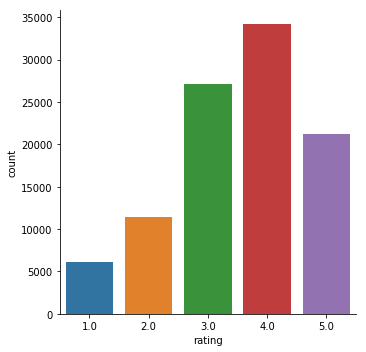

In [102]:
sns.catplot(x = "rating", kind = "count", data = final_train_df);

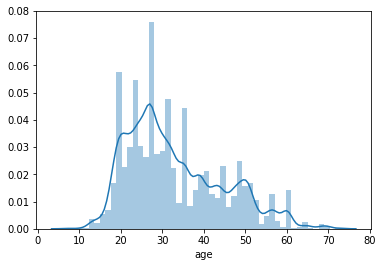

In [95]:
sns.distplot(final_train_df.age, hist = True, kde = True);

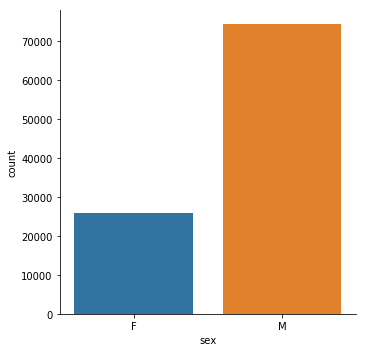

In [101]:
sns.catplot(x = "sex", kind = 'count', data = final_train_df);

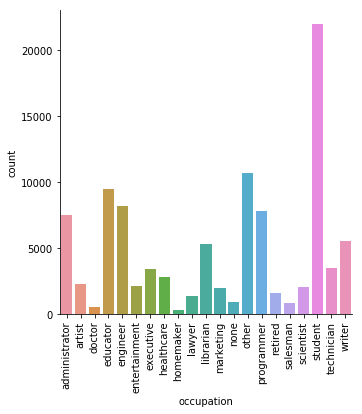

In [106]:
sns.catplot(x = "occupation", kind = "count", data = final_train_df)
plt.xticks(rotation='vertical');